In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [14]:
import pandas as pd

def load_google_stock_data(csv_path):
    # Skip the first two rows (header and ticker rows)
    data = pd.read_csv('Google.csv', skiprows=2)

    # Rename columns to match the expected ones
    data.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
    
    # Remove any leading or trailing spaces from column names
    data.columns = data.columns.str.strip()

    # Convert 'Date' column to datetime type
    data["Date"] = pd.to_datetime(data["Date"])

    # Set the 'Date' column as the index
    data.set_index("Date", inplace=True)

    # Inspect the first few rows to ensure the data looks correct
    print("Columns in CSV file:", data.columns.tolist())
    print("First few rows of the data:\n", data.head())
    
    return data

# Load and clean the data
google_data = load_google_stock_data('Google.csv')


Columns in CSV file: ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
First few rows of the data:
                            Adj Close     Close      High       Low      Open  \
Date                                                                           
2004-11-24 00:00:00+00:00   4.342022  4.352685  4.413706  4.296645  4.354179   
2004-11-26 00:00:00+00:00   4.457057  4.468003  4.483943  4.366633  4.378588   
2004-11-29 00:00:00+00:00   4.498301  4.509348  4.556670  4.421178  4.492162   
2004-11-30 00:00:00+00:00   4.521408  4.532511  4.557916  4.489423  4.500880   
2004-12-01 00:00:00+00:00   4.471220  4.482200  4.545462  4.471988  4.531764   

                              Volume  
Date                                  
2004-11-24 00:00:00+00:00  613531078  
2004-11-26 00:00:00+00:00  260175560  
2004-11-29 00:00:00+00:00  428263241  
2004-11-30 00:00:00+00:00  309154460  
2004-12-01 00:00:00+00:00  315743063  


In [4]:

# Split data into training and test sets (80-20 split)
dataset_train = google_data.iloc[0:int(0.8*len(google_data)), :]
dataset_test = google_data.iloc[int(0.8*len(google_data)):, :]

In [5]:

# Prepare the 'Close' price column as the target
training_set = dataset_train.iloc[:, 1:2].values  # 'Close' is the 2nd column

# Feature Scaling
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:

# Create data structure with 7 timesteps for training the model
X_train, y_train = [], []
for i in range(30, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-30:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:

# Build the LSTM model
regressor = Sequential()
regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.05))
regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(0.05))
regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(0.05))
regressor.add(LSTM(units=100))
regressor.add(Dropout(0.05))
regressor.add(Dense(units=1))


C:\Users\sriva\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:

# Compile and train the model
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs=25, batch_size=32)

# Prepare test data for prediction
real_stock_price = dataset_test.iloc[:, 1:2].values

Epoch 1/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 72ms/step - loss: 0.0122
Epoch 2/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - loss: 8.1084e-04
Epoch 3/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - loss: 7.6390e-04
Epoch 4/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 6.8455e-04
Epoch 5/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - loss: 5.3405e-04
Epoch 6/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 4.6507e-04
Epoch 7/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 5.2383e-04
Epoch 8/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 4.6091e-04
Epoch 9/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - loss: 4.6663e-04
Epoch 10/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 4.0342e-04
Epoch 11/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - loss: 6.9959e-04
Epoch 12/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - loss: 3.9382e-04
Epoch 13/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - loss: 4.9649e-04
Epoch 14/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss

In [9]:

# Combine train and test data for continuity
dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis=0)
testing_set = dataset_total[len(dataset_total) - len(dataset_test) - 7:].values
testing_set = testing_set.reshape(-1, 1)
testing_set = sc.transform(testing_set)

In [10]:

# Create the X_test data structure
X_test = []
for i in range(7, len(testing_set)):
    X_test.append(testing_set[i-7:i, 0])
X_test = np.array(X_test)

# Reshape for LSTM
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step


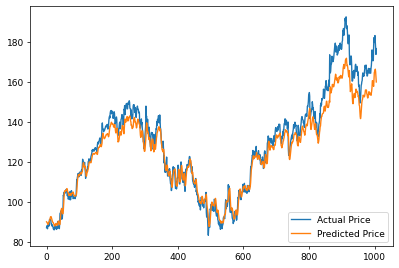

In [11]:

# Predict the stock prices
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Plot results
fig = plt.figure(figsize=(7.2, 4.8), dpi=65)
plt.plot(real_stock_price, label='Actual Price')
plt.plot(predicted_stock_price, label='Predicted Price')
plt.legend(loc=4)
plt.show()

In [12]:

# Calculate RMSE
error_lstm = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

# Forecast the next 5 days (next week’s stock prices)
predicted_next_week = []

In [13]:

# Start with the last 7 days of training data
X_forecast = np.array(X_train[-1, 1:])
X_forecast = np.append(X_forecast, y_train[-1])
X_forecast = np.reshape(X_forecast, (1, X_forecast.shape[0], 1))

# Predict for 5 days (next week)
for day in range(1):
    forecasted_stock_price = regressor.predict(X_forecast)
    forecasted_stock_price = sc.inverse_transform(forecasted_stock_price)
    
    # Print forecasted stock price for each day
    print(f"Day {day + 1}: {forecasted_stock_price[0, 0]}")
    
    # Append the forecasted stock price
    predicted_next_week.append(forecasted_stock_price[0, 0])
    
    # Update X_forecast for the next day's prediction
    X_forecast = np.append(X_forecast[0][1:], forecasted_stock_price[0, 0])
    X_forecast = np.reshape(X_forecast, (1, X_forecast.shape[0], 1))

# Print next week's predicted stock prices
print("##############################################################################")
print("Next week's stock price predictions by LSTM:")
for i, price in enumerate(predicted_next_week, 1):
    print(f"Day {i}: {price}")
print("LSTM RMSE:", error_lstm)
print("##############################################################################")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Day 1: 88.62821960449219
##############################################################################
Next week's stock price predictions by LSTM:
Day 1: 88.62821960449219
LSTM RMSE: 6.639186164159252
##############################################################################
